In [47]:
#Libraries for data manipulation
import pandas as pd
import numpy as np
#Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries for statistical insights
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Librar for EDA
from fasteda import fast_eda

In [48]:
data=pd.read_csv('BlackFriday.csv')
data.sample(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
79755,1000280,P00258742,M,51-55,7,C,0,1,5,NaN,NaN,8831
490019,1003519,P00303442,F,26-35,14,A,1,1,1,8.0,14.0,7717
406675,1002599,P00074642,M,26-35,12,B,2,0,5,9.0,14.0,5458
52629,1002015,P00028542,M,18-25,4,B,4+,0,6,8.0,14.0,20434
420905,1004738,P00344442,M,55+,1,C,1,0,5,8.0,14.0,5327
5121,1000839,P00272142,M,26-35,0,A,2,0,8,NaN,NaN,8051


In [49]:
a = data['Product_Category_2'].isnull().sum()
b = data['Product_Category_3'].isnull().sum()
total = data.shape[0] * data.shape[1]

print(f"Total percent of data missing in Product_Category1 is {round((a/total)*100,2)}%")
print(f"Total percent of data missing in Product_Category2 is {round((b/total)*100,2)}%",)

Total percent of data missing in Product_Category1 is 2.59%
Total percent of data missing in Product_Category2 is 5.79%


In [50]:
#Handling missing data
data['Product_Category_2'].fillna("No-Purchase", inplace=True)
data['Product_Category_3'].fillna("No-Purchase", inplace=True)

#Encoding Product
data['Product_Category_2']=data['Product_Category_2'].replace("No-Purchase",0)
data['Product_Category_3']=data['Product_Category_3'].replace("No-Purchase",0)

data.Product_Category_2=data['Product_Category_2'].astype(int)
data.Product_Category_3=data['Product_Category_3'].astype(int)
data.City_Category=data['City_Category'].astype(str)

data.head()

/tmp/ipykernel_21918/1055756006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product_Category_2'].fillna("No-Purchase", inplace=True)
/tmp/ipykernel_21918/1055756006.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No-Purchase' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Product_Category_2'].fillna("No-Purchase", inplace=True)
/tmp/ipykernel_21918/1055756006.py:3: FutureWarning

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [51]:
#As Gender and City_Category only consist of [M,F] and [A,B,C] respectively.
#I will replace it with numeric values

data['Gender']=data['Gender'].str.strip()
data['Gender']=data['Gender'].map({'F':1,'M':0})

data['City_Category']=data['City_Category'].str.strip()
data['City_Category']=data['City_Category'].map({'A':1,'B':2,'C':3})

In [52]:
def age_to_numeric(age_range):
    if age_range == '55+':
        return 60
    lower, upper = map(int, age_range.split('-'))
    return (lower + upper) / 2 

data['Age'] = data['Age'].map(age_to_numeric).astype(int)


def stay_in_city_years_to_numeric(value):
    if isinstance(value, str) and '+' in value:
        return int(value.split('+')[0])  
    return int(value)  

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map(stay_in_city_years_to_numeric)

data['Age']=data['Age'].astype(int)


In [53]:
#Removing the 'P' prefix and converting the column to numeric
data['Product_ID'] = data['Product_ID'].str.lstrip('P').astype(int)

DataFrame Head:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,69042,1,8,10,1,2,0,3,0,0,8370
1,1000001,248942,1,8,10,1,2,0,1,6,14,15200
2,1000001,87842,1,8,10,1,2,0,12,0,0,1422


DataFrame Tail:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537574,1004737,345942,0,40,16,3,1,0,8,15,0,8043
537575,1004737,285842,0,40,16,3,1,0,5,0,0,7172
537576,1004737,118242,0,40,16,3,1,0,5,8,0,6875


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(537577, 12)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     537577 non-null  int64
 1   Product_ID                  537577 non-null  int64
 2   Gender                      537577 non-null  int64
 3   Age                         537577 non-null  int64
 4   Occupation                  537577 non-null  int64
 5   City_Category               537577 non-null  int64
 6   Stay_In_Current_City_Years  537577 non-null  int64
 7   Marital_Status              537577 non-null  int64
 8   Product_Category_1          537577 non-null  int64
 9   Product_Catego

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/fasteda/__init__.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  full_info.iloc[:,:-2] = full_info.iloc[:,:-2].applymap(lambda x: format(x, '.3f') \
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/fasteda/__init__.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'User_ID                       537577
Product_ID                    537577
Gender                        537577
Age                           537577
Occupation                    537577
City_Category                 537577
Stay_In_Current_City_Years    537577
Marital_Status                537577
Product_Category_1            537577
Product_Category_2            537577
Product_Category_3            537577
Purchase                      537577
Name: count, dtype: object' has dtype incompatible with float64, please explicitly cast 

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
User_ID,537577,1002991.847,1003031,1714.393,1000001,1001495,1003031,1004417,1006040,0.023530,-1.177583
Product_ID,537577,173319.291,165842,101715.608,142,96742,165842,256742,370642,0.132252,-1.081627
Gender,537577,0.246,0,0.431,0,0,0,0,1,1.180081,-0.607410
Age,537577,34.03,30,11.426,8,30,30,40,60,0.346334,-0.180534
Occupation,537577,8.083,7,6.524,0,2,7,14,20,0.399732,-1.216373
City_Category,537577,2.041,2,0.76,1,1,2,3,3,-0.067815,-1.264686
Stay_In_Current_City_Years,537577,1.859,2,1.29,0,1,2,3,4,0.315550,-1.070565
Marital_Status,537577,0.409,0,0.492,0,0,0,1,1,0.371036,-1.862332
Product_Category_1,537577,5.296,5,3.751,1,1,5,8,18,0.866642,0.694988
Product_Category_2,537577,6.785,5,6.212,0,0,5,14,18,0.298575,-1.480305


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



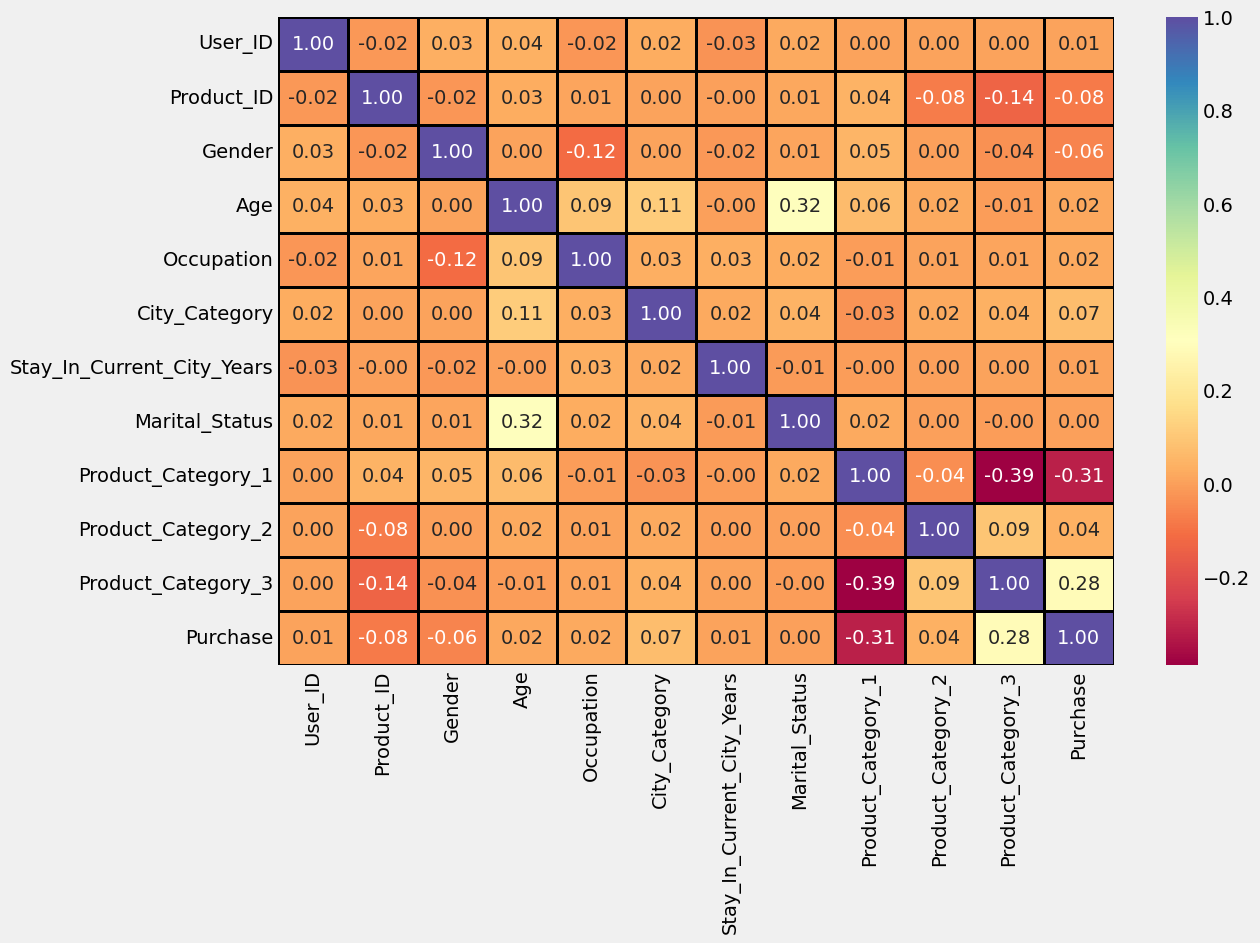

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



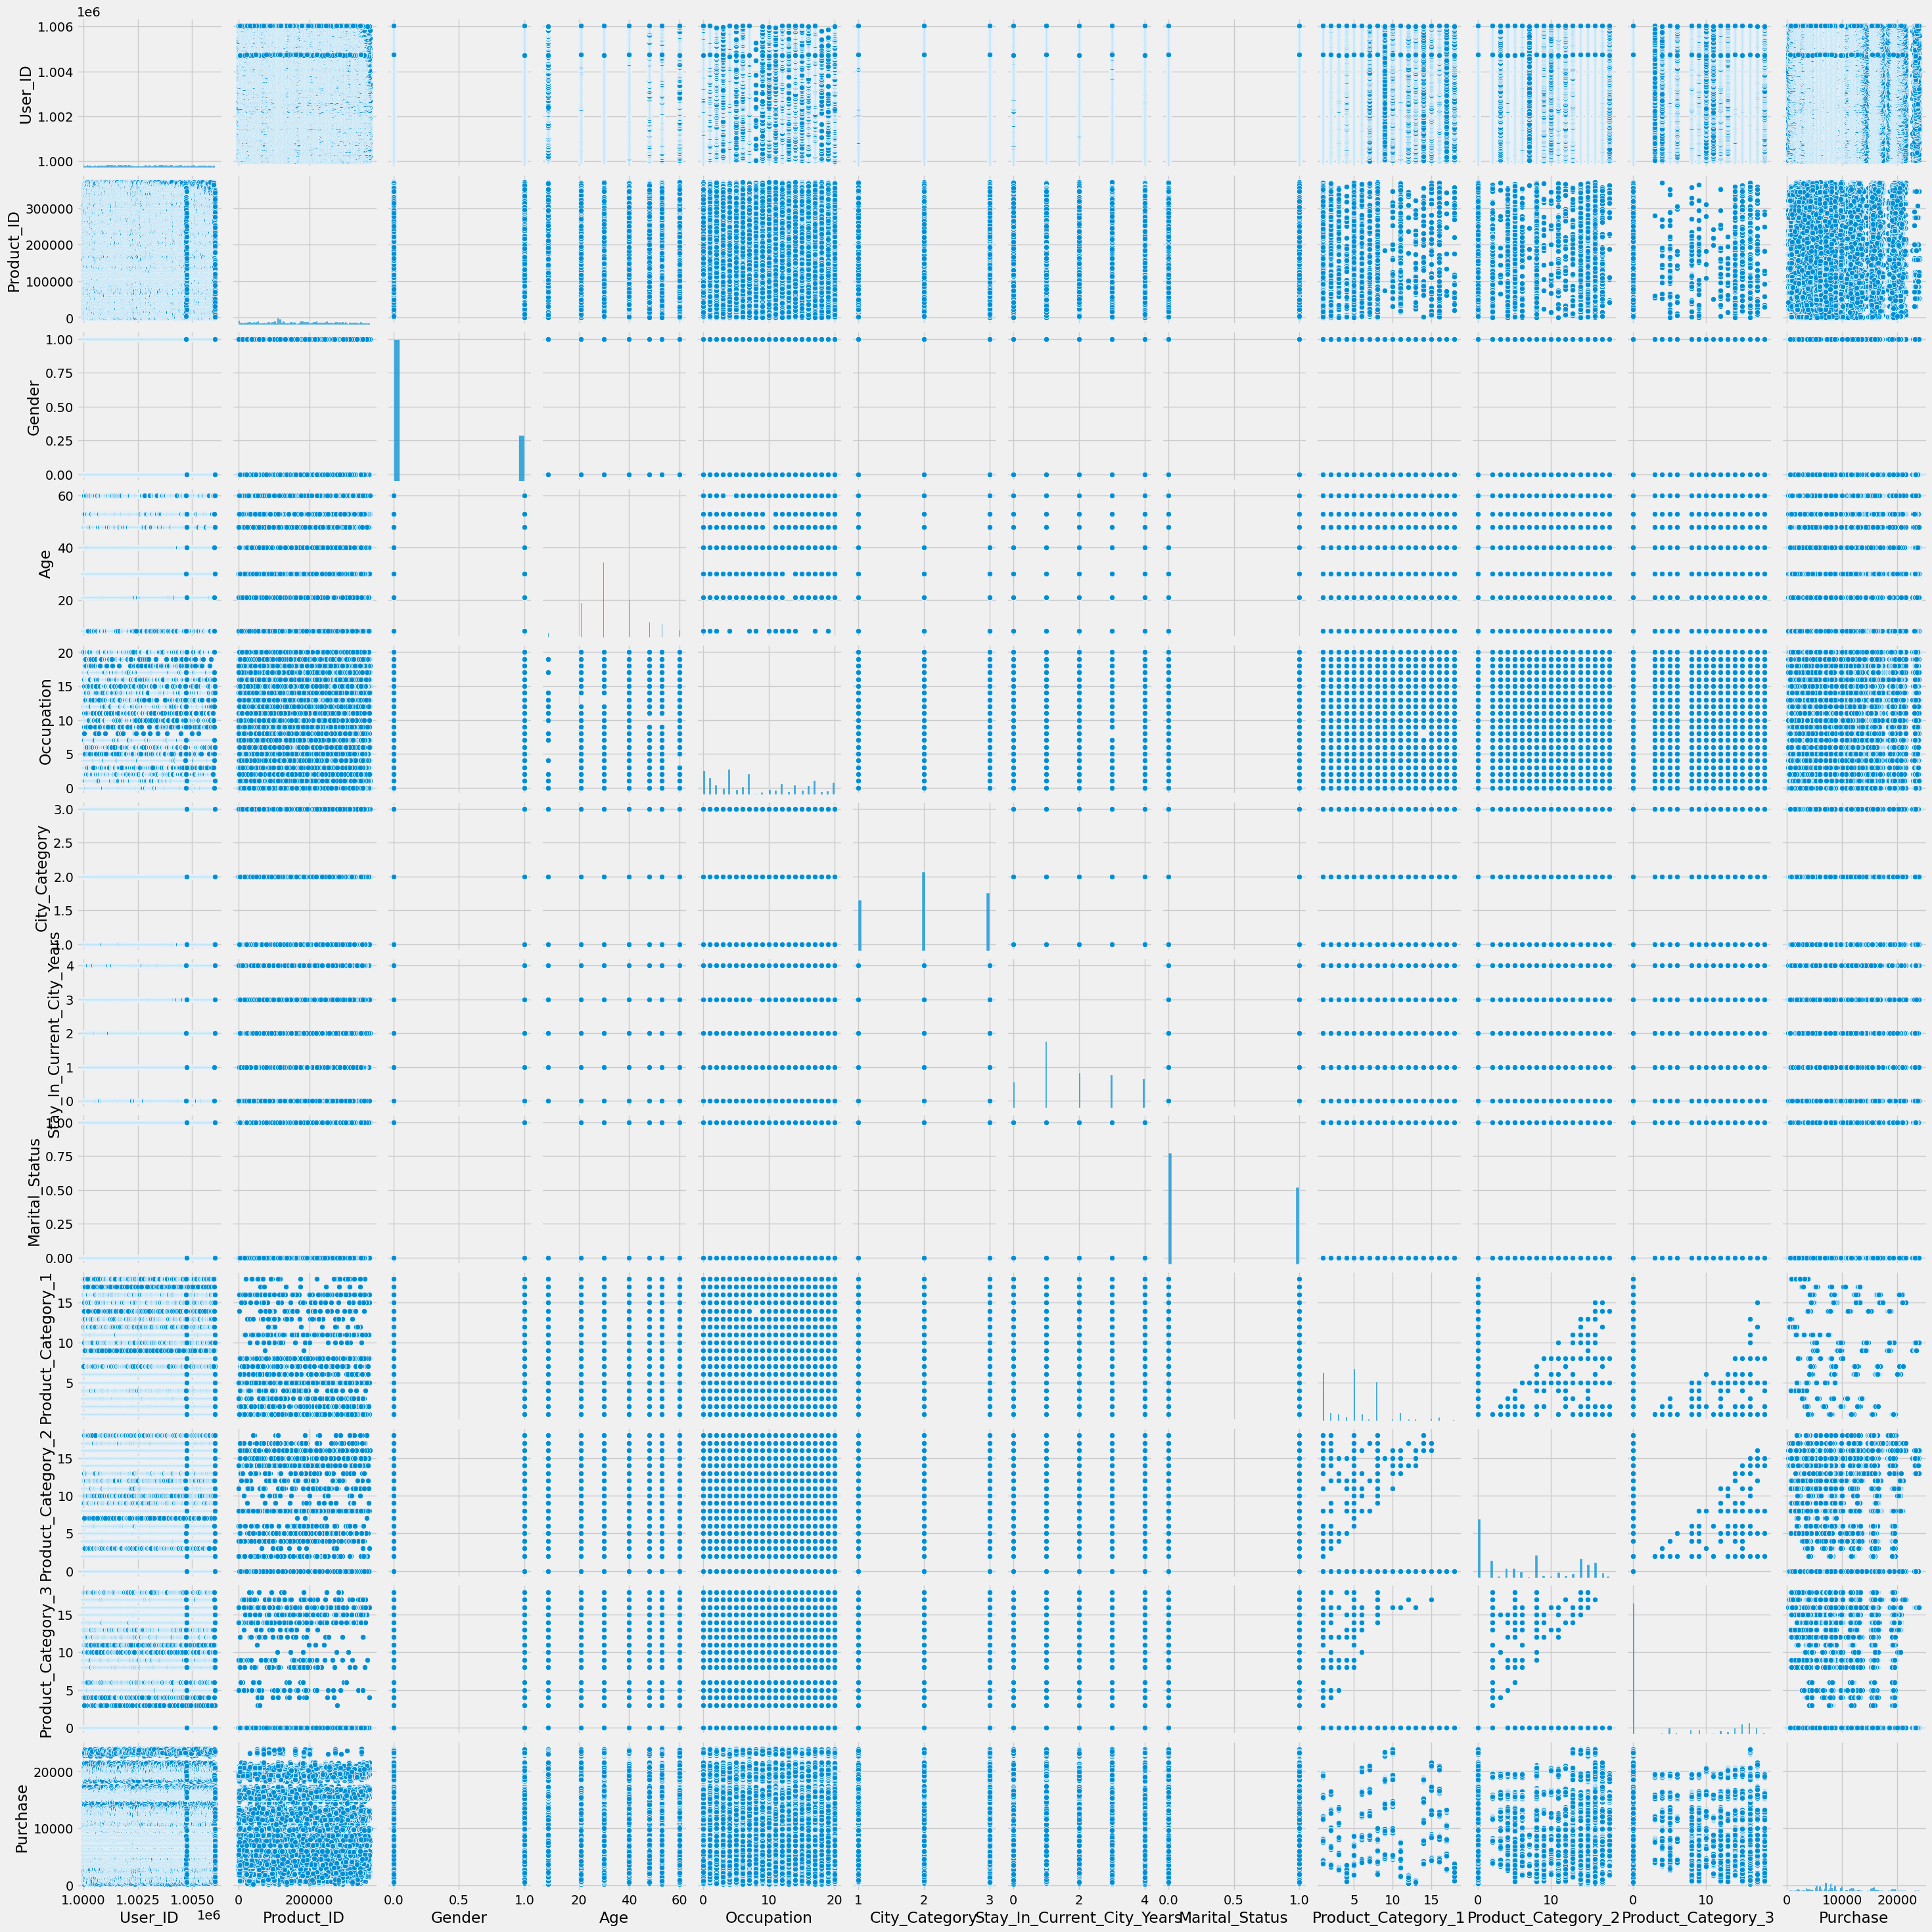

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



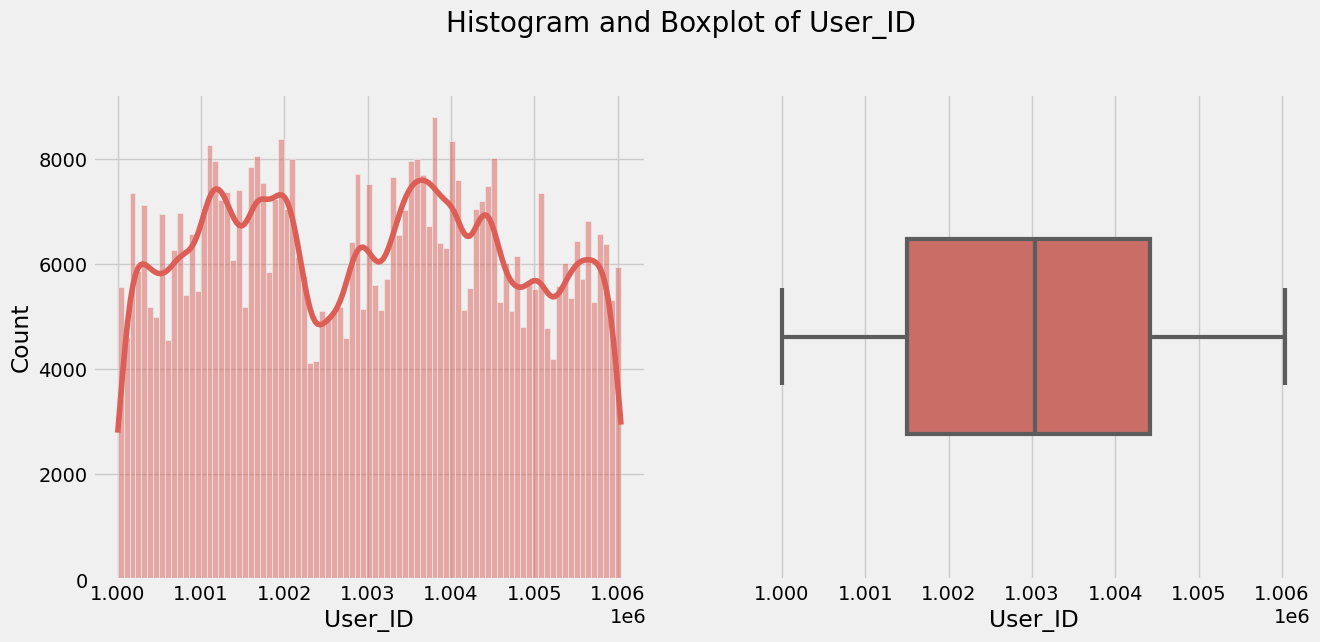

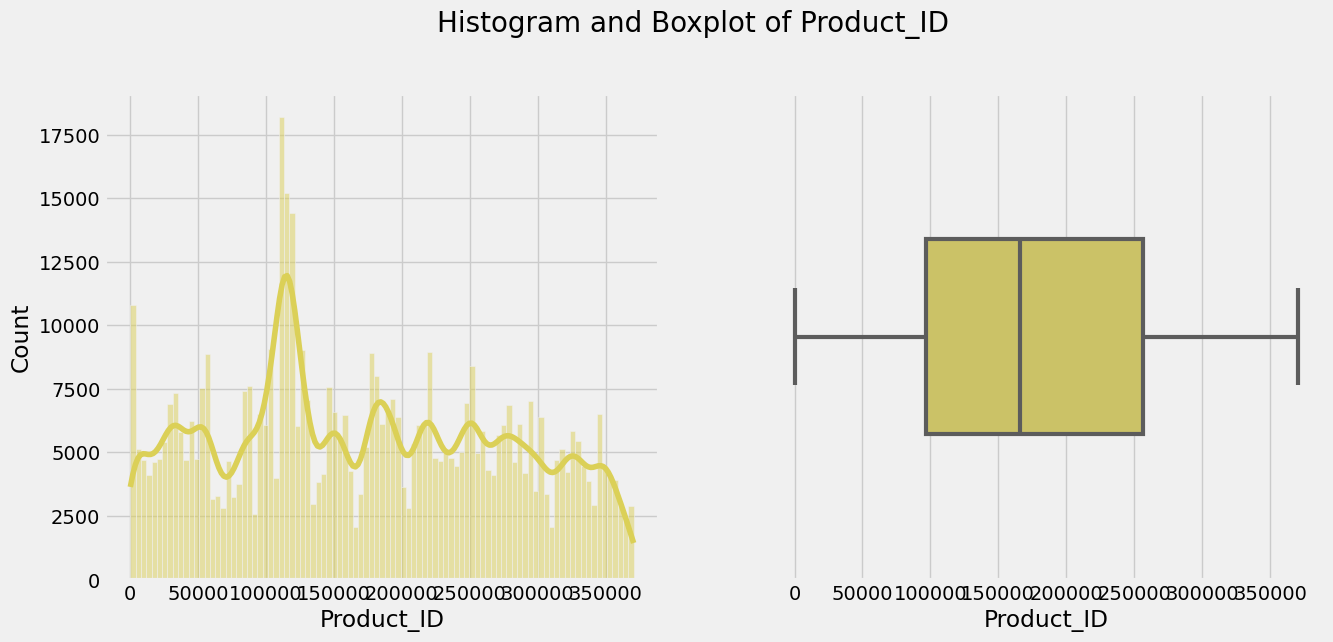

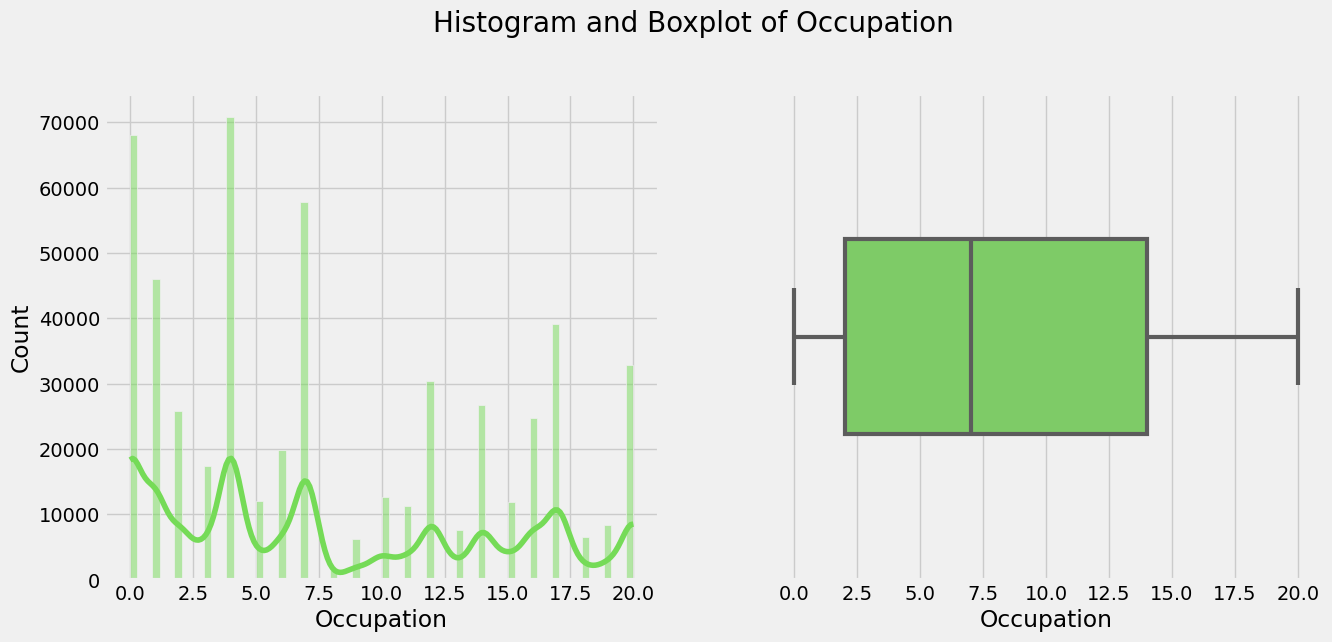

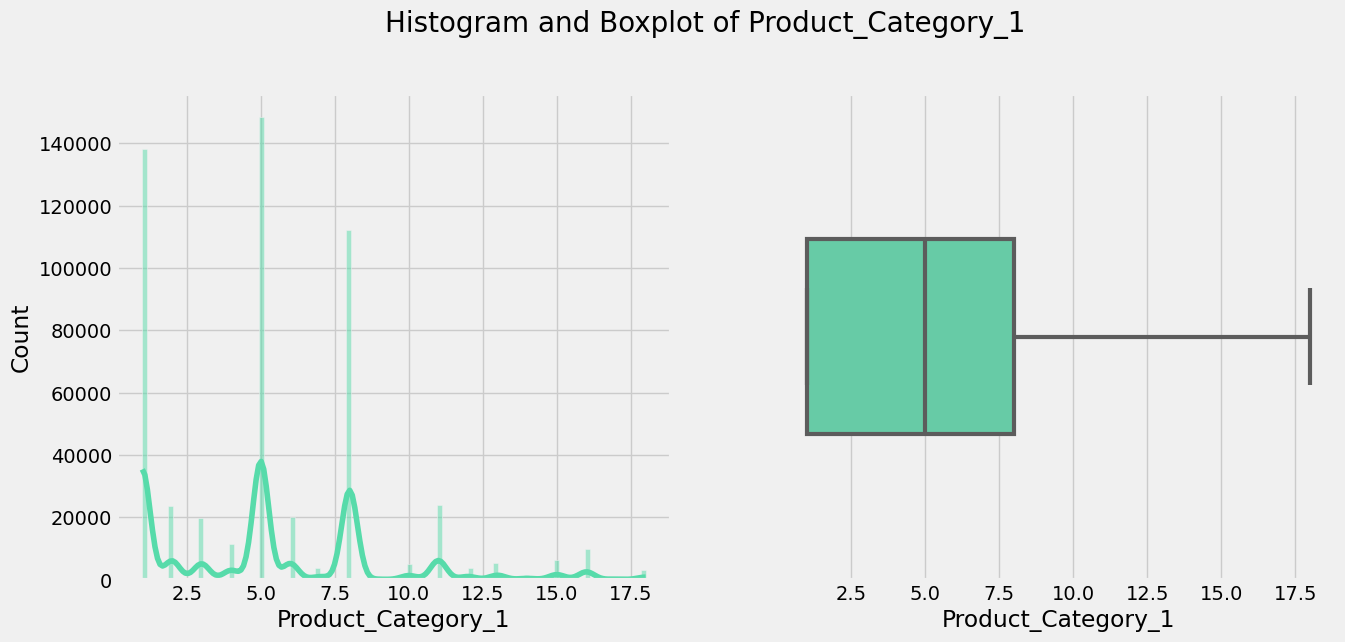

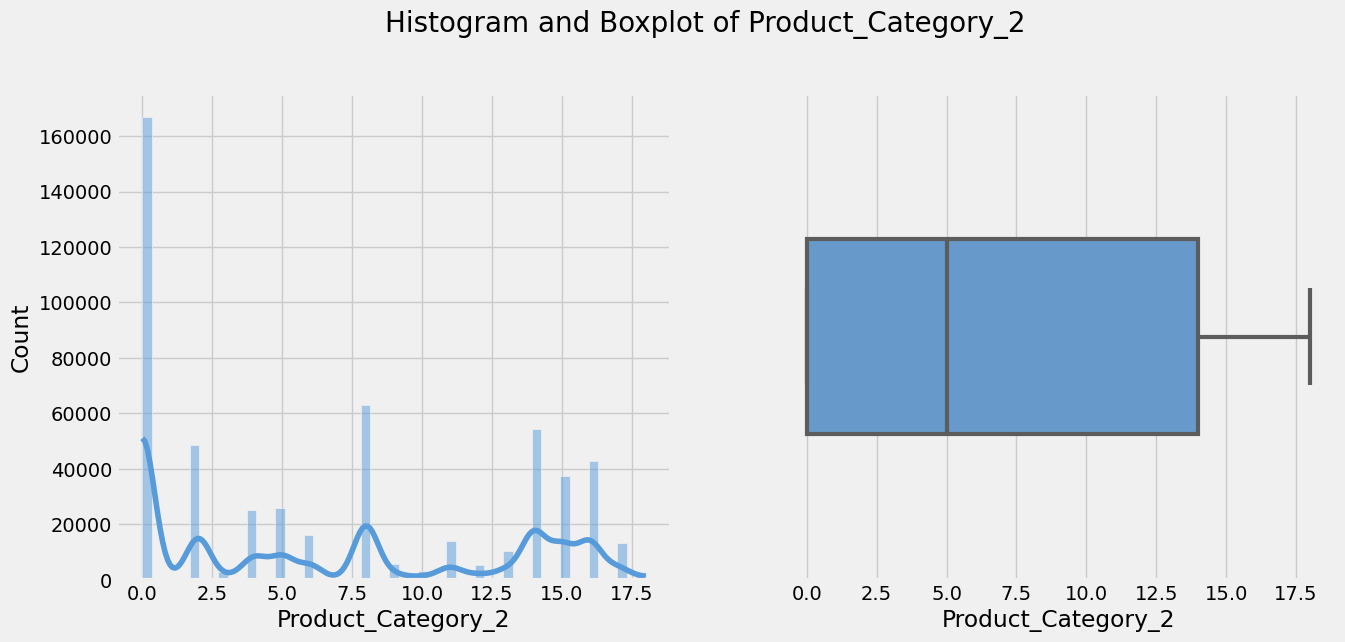

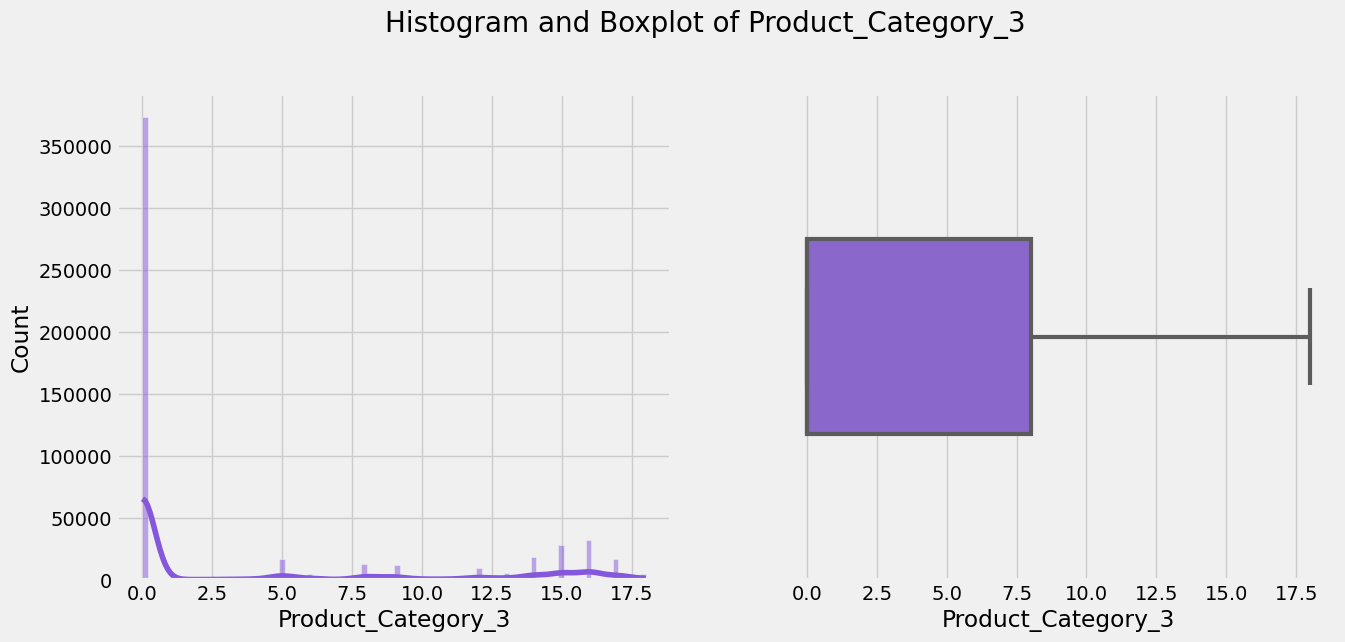

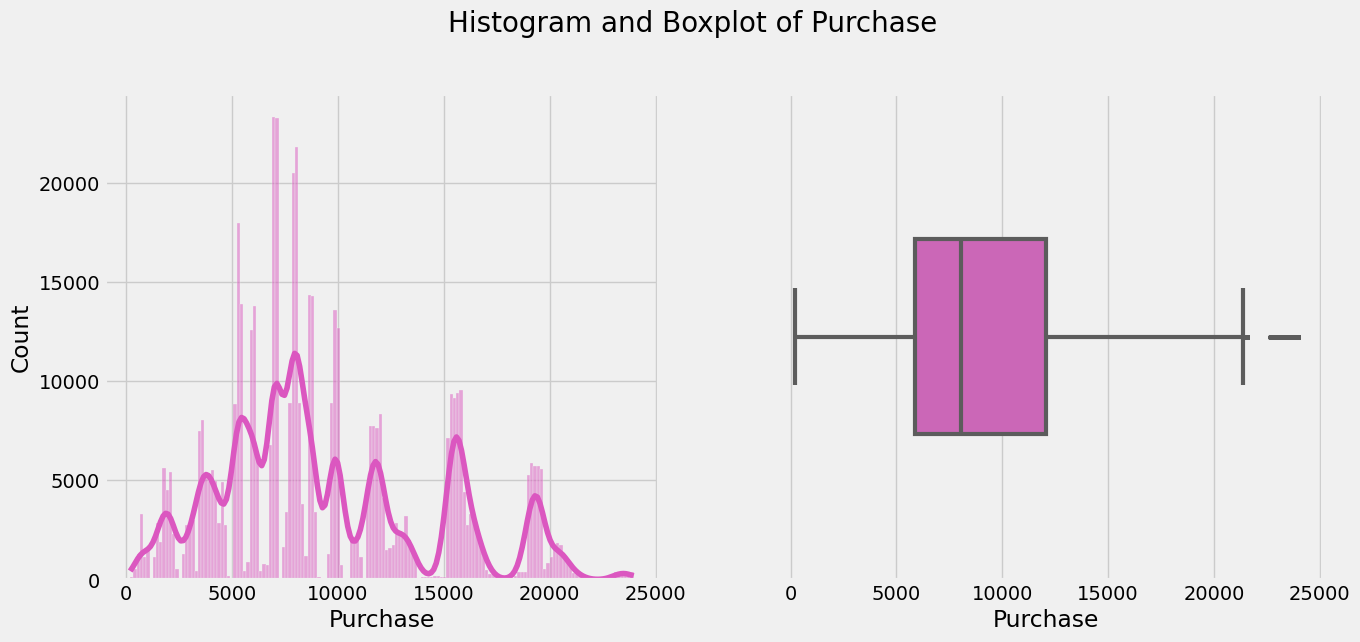

----------------------------------------------------------------------------------------------------
Countplot(s):



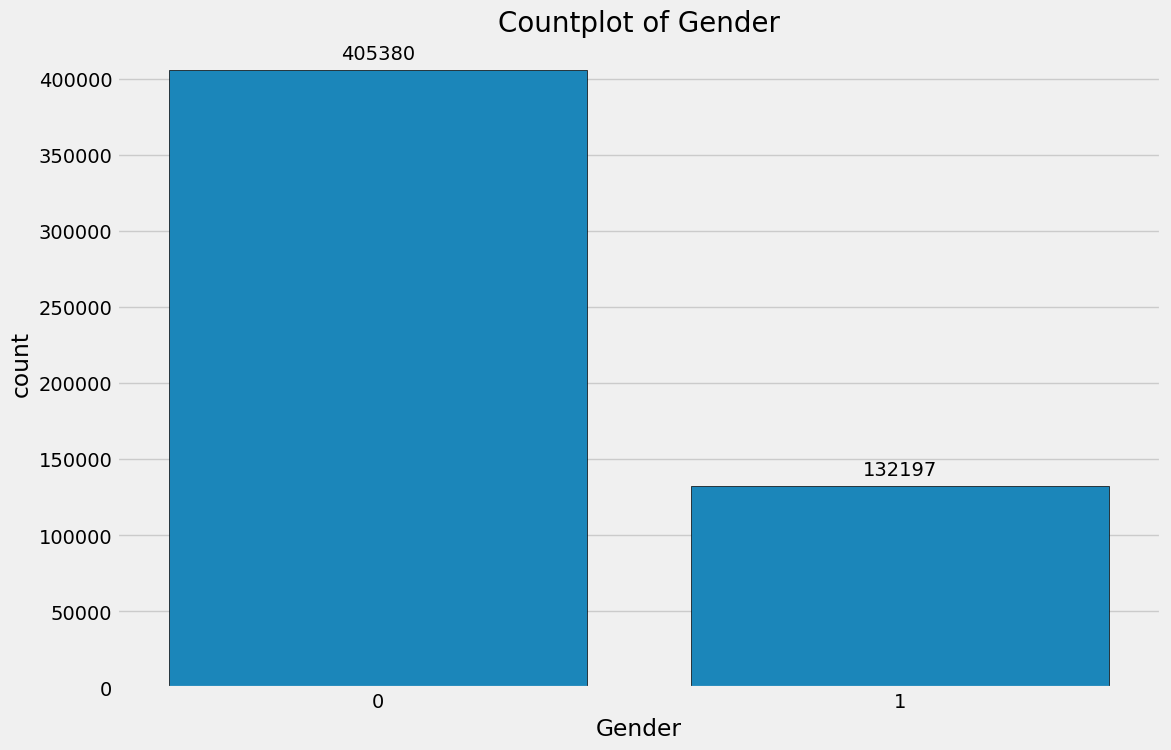

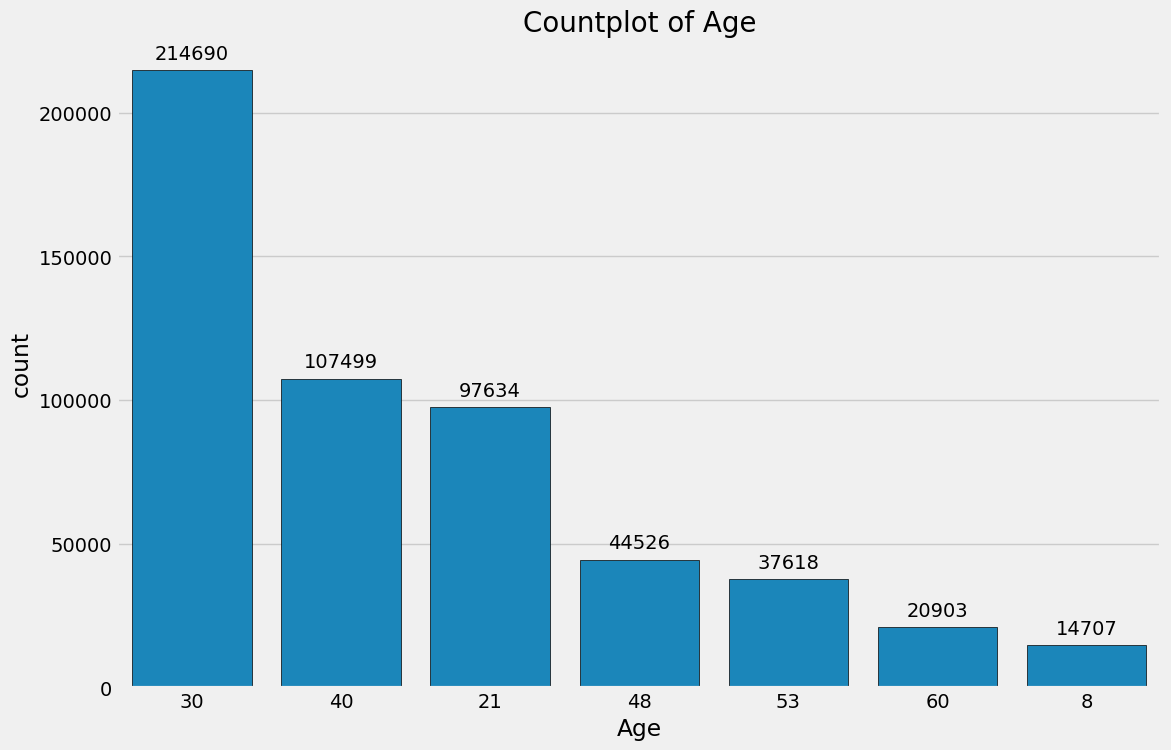

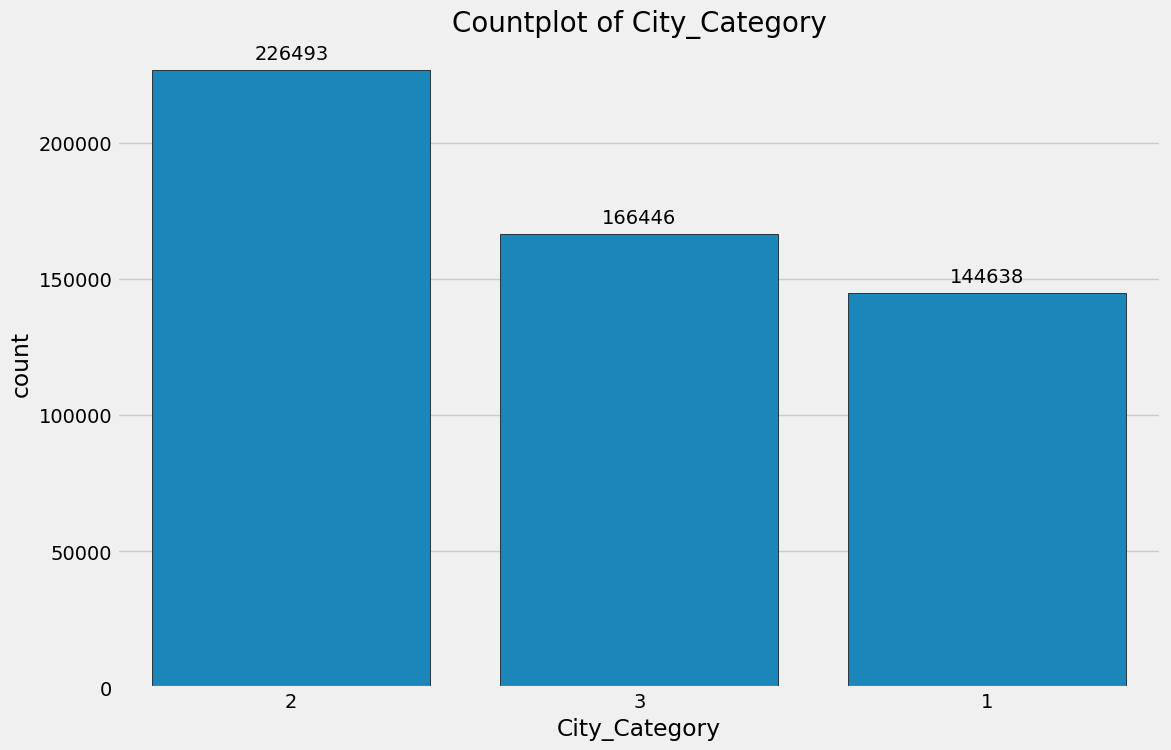

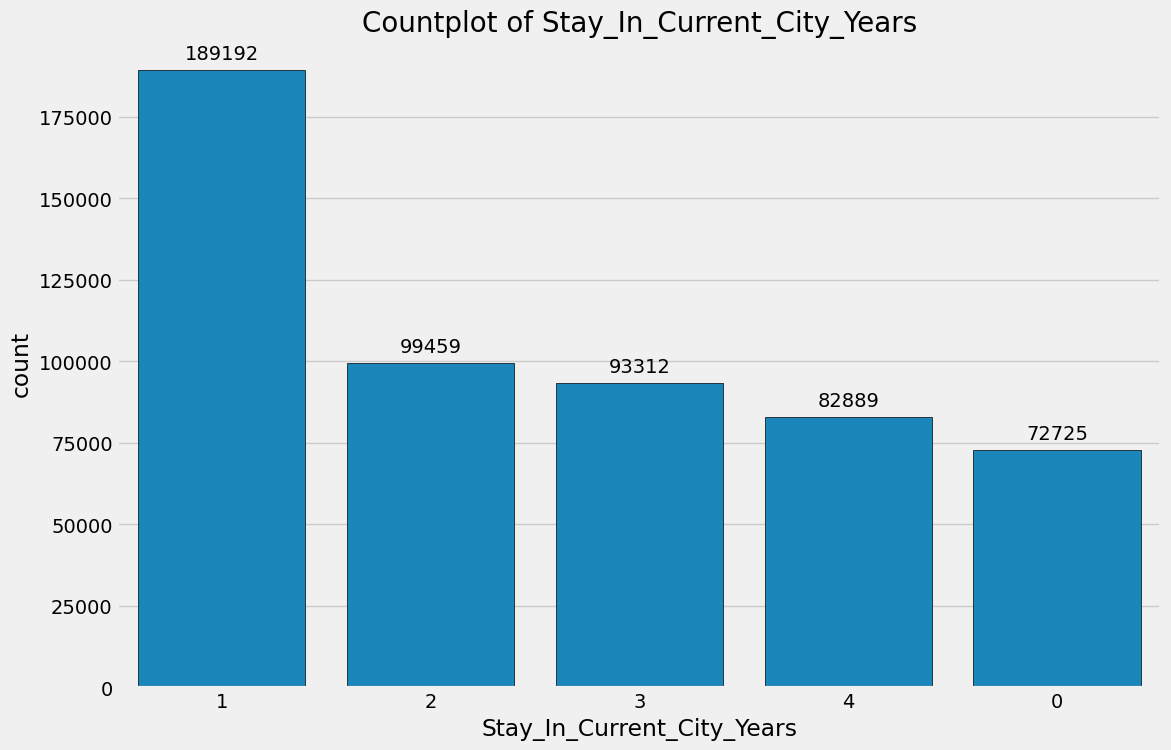

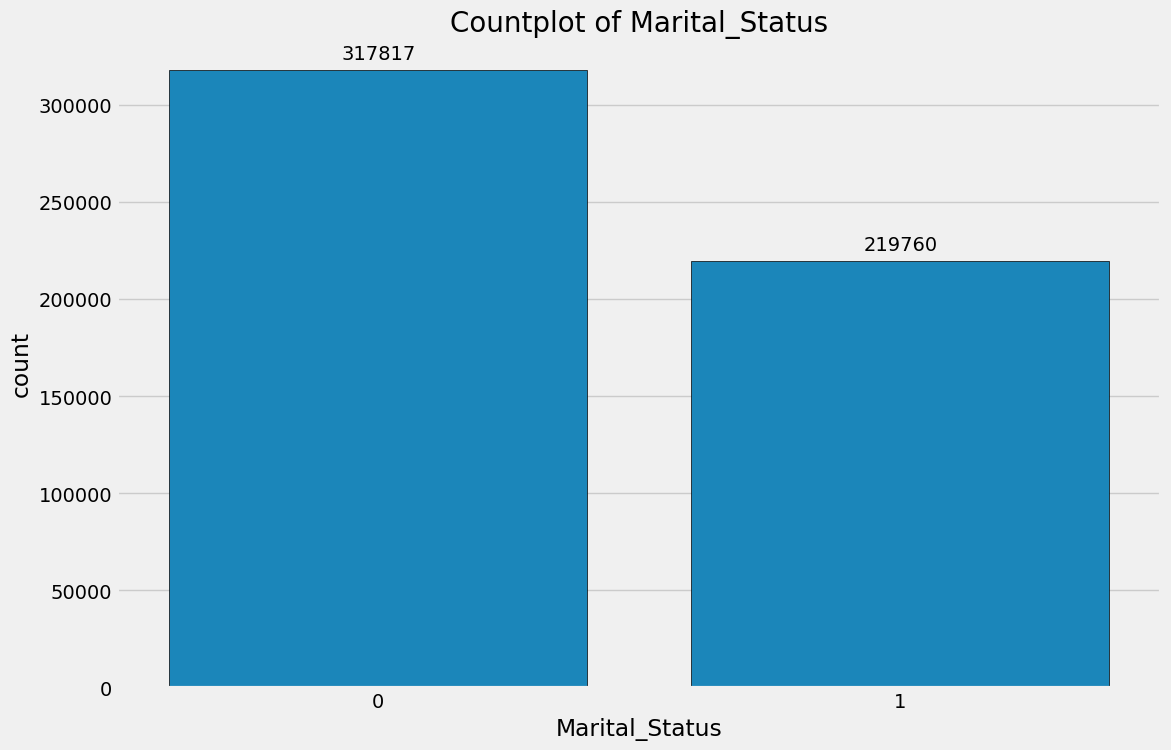

In [54]:
#Performing EDA using fast_eda
fast_eda(data)

In [56]:
#Performing Hypothesis testing
#People of age group 30 tend to purchase more than any other age group
def categorize_age(age):
    if age < 30:
        return '<30'
    elif age == 30:
        return '30'
    else:
        return '>30'
data['Age_Group'] = data['Age'].map(categorize_age)

age_group_purchase = data.groupby('Age_Group')['Purchase'].mean()
print(age_group_purchase)

Age_Group
30     9314.588970
<30    9207.041828
>30    9421.176304
Name: Purchase, dtype: float64


In [57]:
# H0: There is no significant difference in the average purchase amount between people aged 30 and other age groups.
# H1: People aged 30 tend to purchase more than people in other age groups.
#Performing anove test on the data
from scipy import stats
f_stat, p_value = stats.f_oneway(data[data['Age_Group'] == '<30']['Purchase'],
                                  data[data['Age_Group'] == '30']['Purchase'],
                                  data[data['Age_Group'] == '>30']['Purchase'])

print(f"F-statistic: {f_stat}, p-value: {p_value}")

if p_value < 0.05:
    print("I reject the Null Hypothesis")
else:
    print("I reject the Alterantive Hypothesis")

#So, now whenever a Black Friday Sale is held they should focus more on people between or with age 30


F-statistic: 70.38581863654096, p-value: 2.727903640539358e-31
I reject the Null Hypothesis


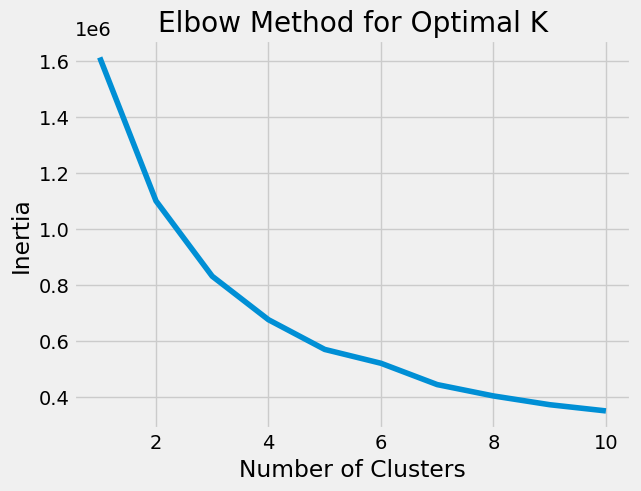

In [59]:
X = data[['Age', 'Purchase', 'Product_Category_1']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/home/gitpod/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


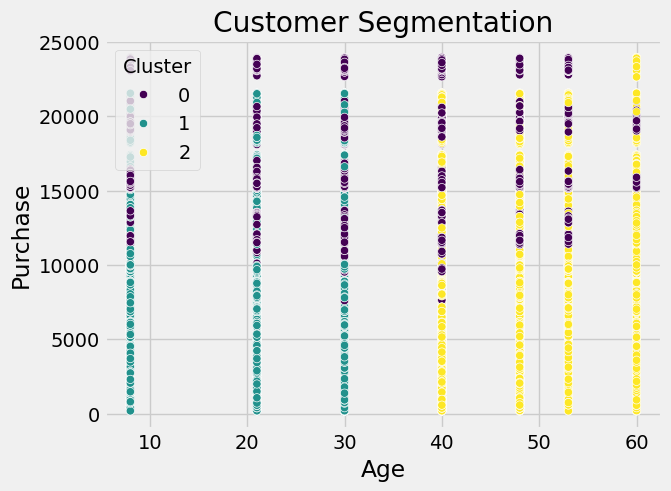

In [60]:
#We are creating 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=data['Age'], y=data['Purchase'], hue=data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()
